Training data size: 316
Testing data size: 80


e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\3RD YEAR\6th Se


Best AR order selected using AIC: AR(14)

AR Model Summary:
                                 SARIMAX Results                                  
Dep. Variable:     Power_Consumption_diff   No. Observations:                  316
Model:                    ARIMA(14, 0, 0)   Log Likelihood                -729.490
Date:                    Thu, 29 Jan 2026   AIC                           1490.980
Time:                            12:05:28   BIC                           1551.072
Sample:                        02-01-1988   HQIC                          1514.986
                             - 05-01-2014                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1324      0.036      3.685      0.000       0.062       0.203
ar.L1         -0.3718      0.052     -

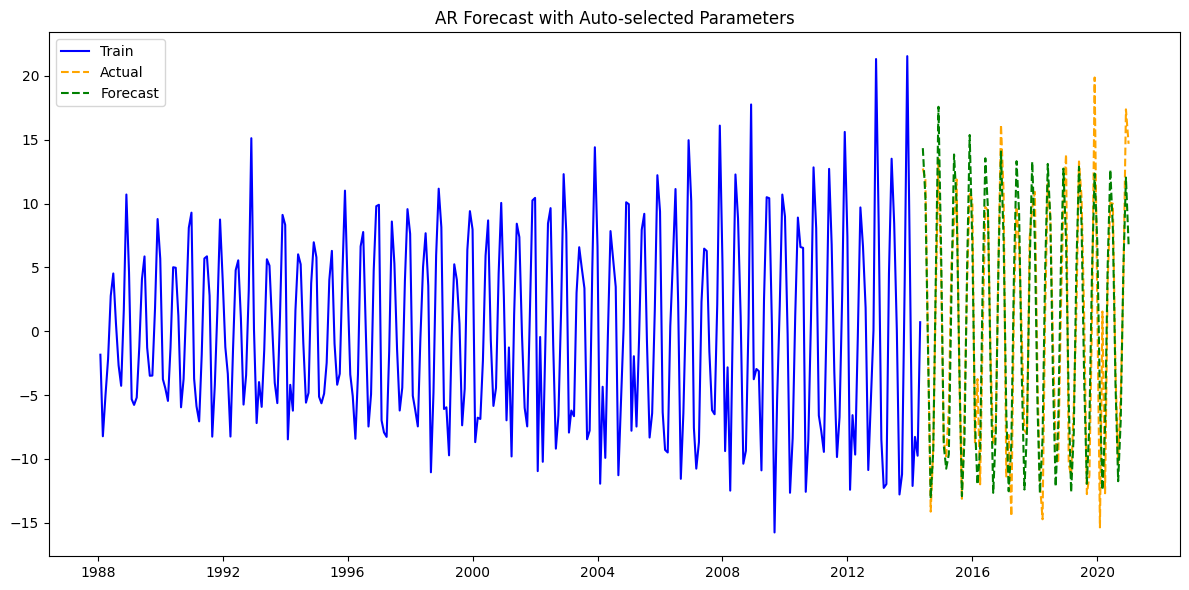

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------------
# 1. Load CSV file
# -------------------------------
df = pd.read_csv("ML471_S2_Datafile_Concept(in).csv")

# Datetime parsing with coerce
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['Datetime'])

# Set Datetime as index with monthly frequency
df.set_index('Datetime', inplace=True)
df = df.asfreq('MS')

# Drop missing differenced values
df = df.dropna(subset=['Power_Consumption_diff'])

series = df['Power_Consumption_diff']

# -------------------------------
# 2. Train-test split (80:20)
# -------------------------------
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")

# -------------------------------
# 3. AR(p) selection using AIC
# -------------------------------
best_aic = np.inf
best_p = 0
best_model = None

for p in range(0, 15):
    try:
        model = ARIMA(train, order=(p, 0, 0))
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_p = p
            best_model = result
    except:
        continue

print(f"\nBest AR order selected using AIC: AR({best_p})")

# -------------------------------
# 4. Model summary
# -------------------------------
print("\nAR Model Summary:")
print(best_model.summary())

# -------------------------------
# 5. Ljung–Box test
# -------------------------------
ljung_box = acorr_ljungbox(best_model.resid, lags=[1], return_df=True)
print("\nLjung–Box Test (lag = 1):")
print(ljung_box)

# -------------------------------
# 6. Forecasting
# -------------------------------
forecast = best_model.forecast(steps=len(test))
forecast.index = test.index

# -------------------------------
# 7. Evaluation metrics
# -------------------------------
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nForecast Accuracy Metrics:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f}%")

# -------------------------------
# 8. Visualization
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', linestyle='--', color='orange')
plt.plot(forecast, label='Forecast', linestyle='--', color='green')

plt.title("AR Forecast with Auto-selected Parameters")
# plt.xlabel("Year")
# plt.ylabel("Power_Consumption_diff")
plt.legend()
plt.tight_layout()
plt.show()
